In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [4]:
Data=pd.read_csv(r"C:\Users\udaya\Project Pythonn\IBM\Traffic_Volume\traffic volume.csv")

In [5]:
Data.head()


,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [6]:
Data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [8]:
Data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [9]:
Data['temp'] = Data['temp'].fillna(Data['temp'].mean())
Data['rain'] = Data['rain'].fillna(Data['rain'].mean())
Data['snow'] = Data['snow'].fillna(Data['snow'].mean())

In [10]:
from collections import Counter

print(Counter(Data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [12]:
Data['weather'] = Data['weather'].fillna('Clouds')


In [13]:
from sklearn.preprocessing import LabelEncoder

le_holiday = LabelEncoder()
le_weather = LabelEncoder()

Data['holiday'] = le_holiday.fit_transform(Data['holiday'].astype(str))
Data['weather'] = le_weather.fit_transform(Data['weather'].astype(str))

In [14]:
Data.corr(numeric_only=True)


,holiday,temp,rain,snow,weather,traffic_volume
holiday,1.000000,0.004646,0.000177,0.000863,-0.001851,0.038057
temp,0.004646,1.000000,0.009070,-0.019758,-0.033559,0.130034
rain,0.000177,0.009070,1.000000,-0.000090,0.009542,0.004714
snow,0.000863,-0.019758,-0.000090,1.000000,0.036662,0.000735
weather,-0.001851,-0.033559,0.009542,0.036662,1.000000,-0.040035
traffic_volume,0.038057,0.130034,0.004714,0.000735,-0.040035,1.000000


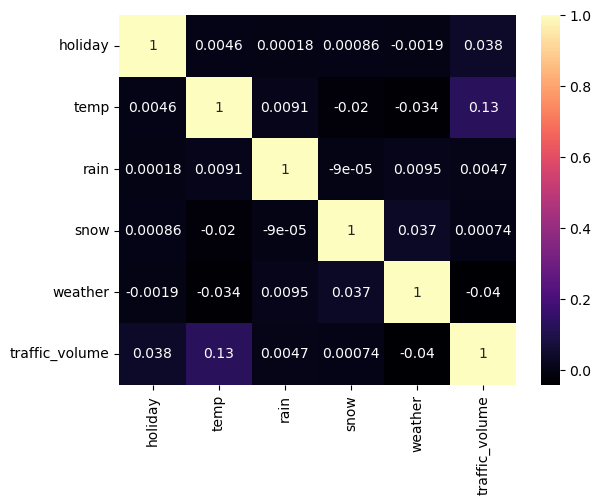

In [16]:
cor = Data.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cor, annot=True, cmap='magma')
plt.show()


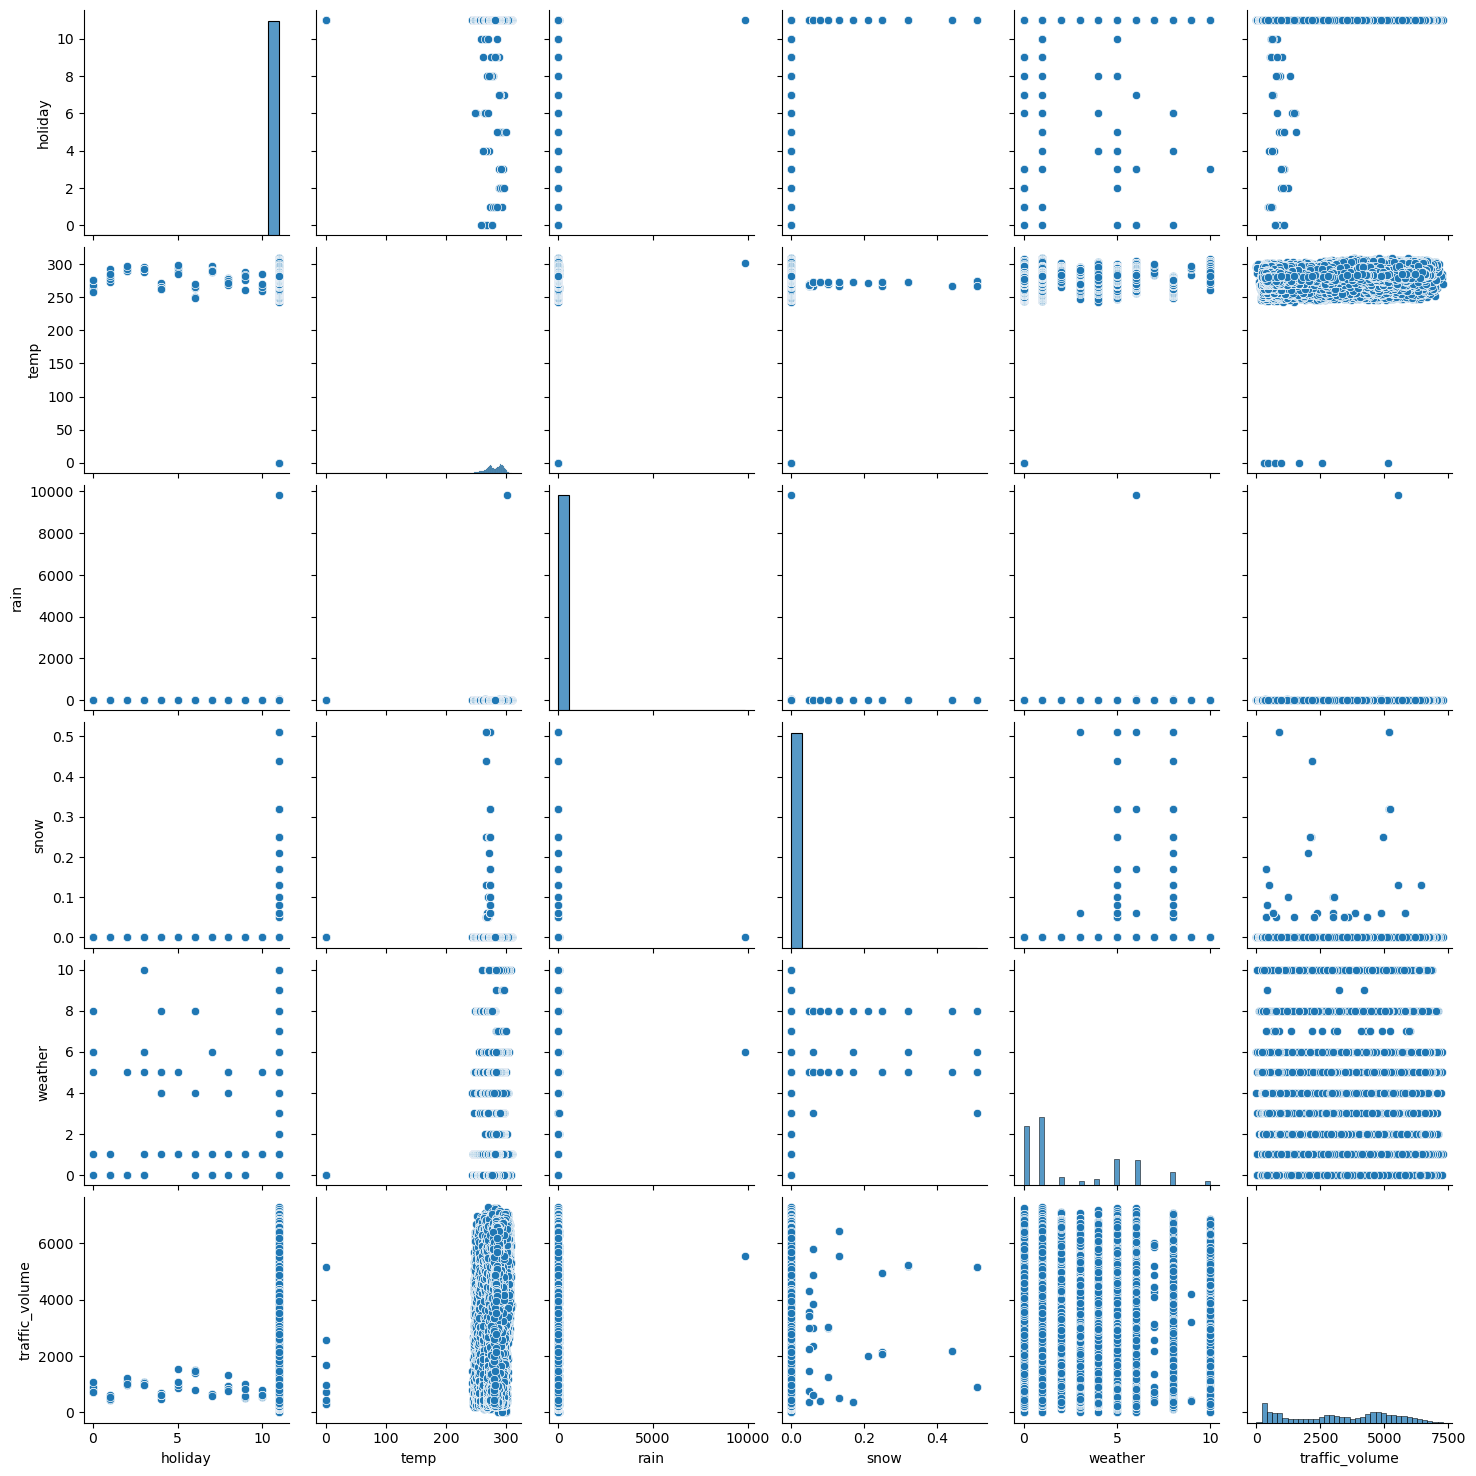

In [17]:
sns.pairplot(Data)

<Axes: >

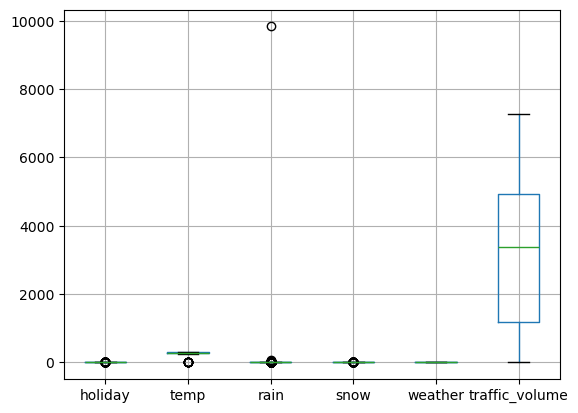

In [18]:
Data.boxplot()

In [19]:
Data[["day", "month", "year"]] = Data["date"].str.split("-", expand = True)

In [20]:
print(Data.columns)

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume', 'day', 'month', 'year'],
      dtype='object')


In [21]:
# Step 1: Combine 'date' and 'Time' columns into one string
Data['date_time'] = Data['date'] + ' ' + Data['Time']

# Step 2: Convert to datetime
Data['date_time'] = pd.to_datetime(Data['date_time'], format="%d-%m-%Y %H:%M:%S")

# Step 3: Extract hour, minute, second
Data['hour'] = Data['date_time'].dt.hour
Data['minute'] = Data['date_time'].dt.minute
Data['second'] = Data['date_time'].dt.second

In [22]:
Data.drop(columns=['date','Time'],axis=1,inplace=True)

In [23]:
Data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,date_time,hour,minute,second
0,11,288.28,0.0,0.0,1,5545,02,10,2012,2012-10-02 09:00:00,9,0,0
1,11,289.36,0.0,0.0,1,4516,02,10,2012,2012-10-02 10:00:00,10,0,0
2,11,289.58,0.0,0.0,1,4767,02,10,2012,2012-10-02 11:00:00,11,0,0
3,11,290.13,0.0,0.0,1,5026,02,10,2012,2012-10-02 12:00:00,12,0,0
4,11,291.14,0.0,0.0,1,4918,02,10,2012,2012-10-02 13:00:00,13,0,0


In [24]:
y = Data['traffic_volume']
x = Data.drop(columns=['traffic_volume'],axis=1)

In [25]:
names = x.columns

In [26]:
from sklearn.preprocessing import scale

In [27]:
x = x.select_dtypes(include=['number'])

names = x.columns

from sklearn.preprocessing import scale
x = scale(x)

x = pd.DataFrame(x, columns=names)

In [28]:
x.head()

,holiday,temp,rain,snow,weather,hour,minute,second
0,0.031687,0.530485,-0.007463,-0.027235,-0.566452,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.566452,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.566452,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.566452,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.566452,0.230807,0.0,0.0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=0)

In [32]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [34]:
lin_reg =linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [35]:
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [36]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [38]:
from sklearn import metrics

In [39]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.531850945659356
0.9894309901019318
0.9540366395720952
-2.3437900566314758
0.7742197513580322


In [40]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

In [41]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.3884246995383265
0.6279411879326127
0.7141476301055751
-2.2688278213413025
0.7416274547576904


In [42]:
MSE = metrics.mean_squared_error(p3,y_test)

In [43]:
np.sqrt(MSE)

np.float64(982.1156459346253)

In [44]:
import pickle

In [56]:
pickle.dump(Rand, open("model.pkl", 'wb'))     
pickle.dump(le, open("encoder.pkl", 'wb'))

In [57]:
Data.head()
x.head()

,holiday,temp,rain,snow,weather,hour,minute,second
0,0.031687,0.530485,-0.007463,-0.027235,-0.566452,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.566452,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.566452,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.566452,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.566452,0.230807,0.0,0.0


In [58]:
y.head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

In [59]:
x.shape

(48204, 8)

In [60]:
y.shape

(48204,)